In [15]:
path = "Results/gecco_min_gen/mask_testing_2/gecco_nhead_4_mask_1_options_all_lr_0.0001_h_m_feats/gecco/"
# path = "aaai_Outputs_electricity_e336_d168_testprune_2_rp/electricity/"
# path = "Outputs_electricity_e336_d168_original_huber/electricity/"
#path = "Outputs_synthetic/foodinflation/"

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
preds = np.load(path+'trans-nll-ar_pred_mu.npy')
inputs = np.load(path+'inputs.npy')
trues = np.load(path+'targets.npy')
#preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
#trues = trues.reshape(-1, preds.shape[-2], preds.shape[-1])
# [samples, pred_len, dimensions]
print(preds.shape, trues.shape, inputs.shape)

print("mse : ",mean_squared_error(trues.squeeze(),preds.squeeze()),"mae: ",mean_absolute_error(trues.squeeze(),preds.squeeze()))

(376, 180, 1) (376, 180, 1) (376, 180, 1)
mse :  0.0044257175 mae:  0.013134464


In [ ]:
plt.rcParams['figure.figsize'] = (12,4)
x = np.arange(inputs.shape[1]+preds.shape[1])
a = inputs.shape[1]

for i in range(54):
    plt.figure()
    c =i 
    plt.plot(x[:a],inputs[c],label='input '+str(c))
    plt.plot(x[a:],trues[c,:,0], label='GroundTruth '+str(c))
    #for i in range(1):

    plt.plot(x[a:],preds[c,:,0], label='Prediction '+str(mean_squared_error(preds[c,:,0],inputs[c,:,0])))
    
    plt.legend()
    # fig = plt.figure()
    # plt.savefig("images/trans-mse_test_"+str(i)+".png")
    
    # plt.show()

In [36]:
a = preds.shape
N_input = 180
x = len( range(0,N_input-25,25))+1
print(x)
pred = preds.reshape(-1,x,a[1])
true = trues.reshape(-1,x,a[1])

print(pred.shape)
result = []
for i in range(len(pred)):
    mse = []
    for j,p in enumerate(pred[i]):
        mse.append(mean_squared_error(true[i,j],p))
    result.append(mse)
result = np.array(result)
print(result.shape)
argmin = np.argmin(result,axis=1)
# print(result)
print(argmin)
new_pred = np.array([pred[i,argmin[i]] if argmin[i]!=0 else true[i,argmin[i]] for i in range(47)])
new_true = np.array([true[i,argmin[i]] for i in range(47)])
print(new_pred.shape,new_true.shape)
print("mse : ",mean_squared_error(new_true.squeeze(),new_pred.squeeze()))

8
(47, 8, 180)
(47, 8)
[5 0 3 1 1 0 6 0 4 5 1 7 5 0 6 1 7 0 3 6 5 4 7 1 5 0 1 5 1 2 6 1 1 3 7 1 2
 6 0 3 3 0 0 0 2 0 6]
(47, 180) (47, 180)
mse :  0.00121122


<ipython-input-48-bef40d18061c>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


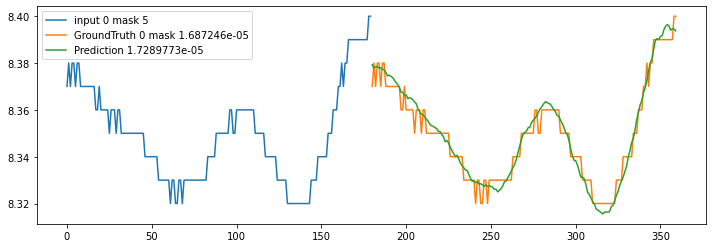

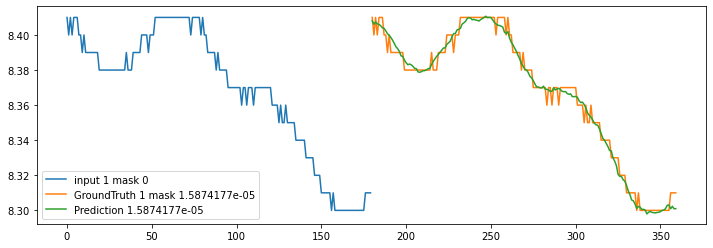

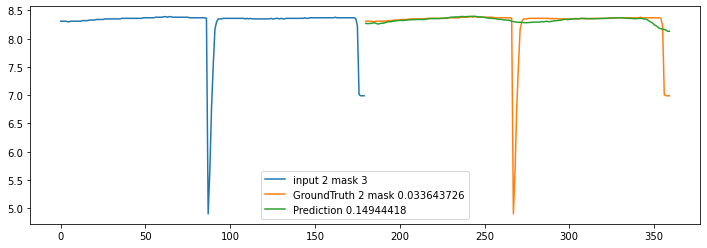

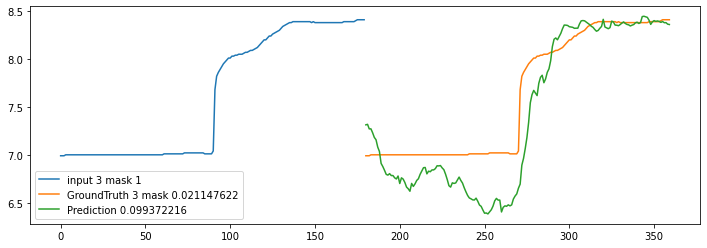

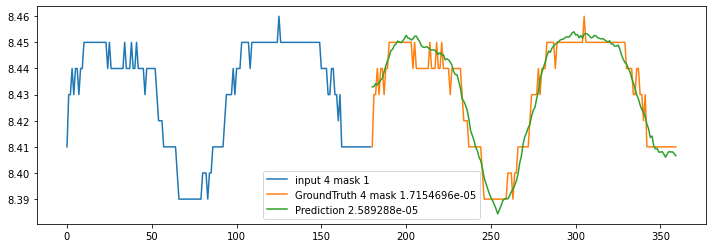

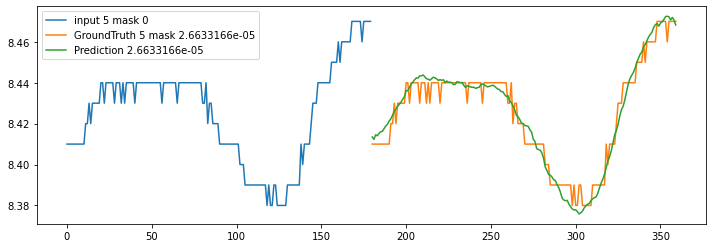

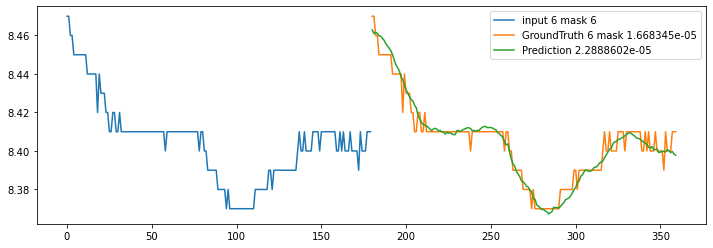

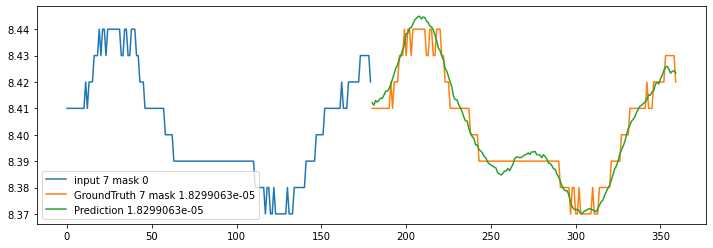

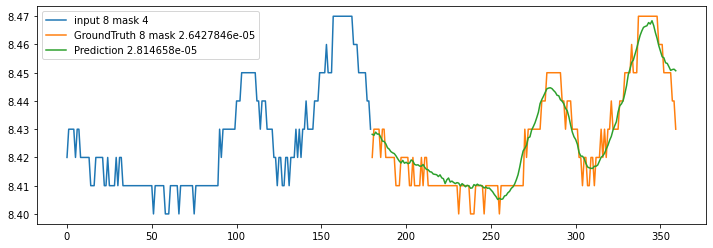

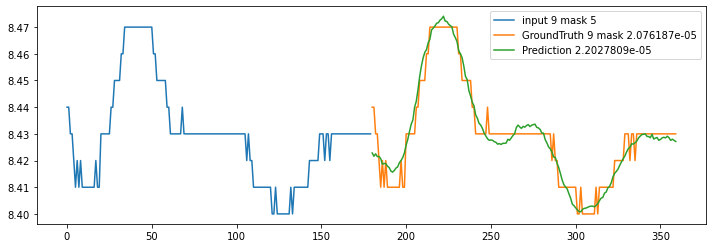

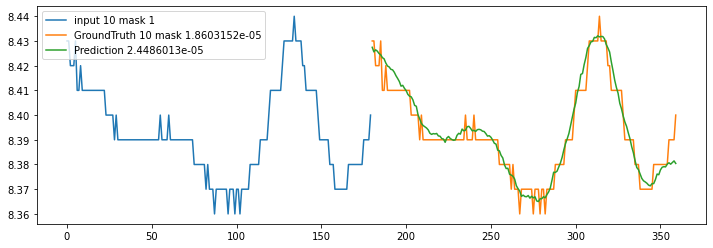

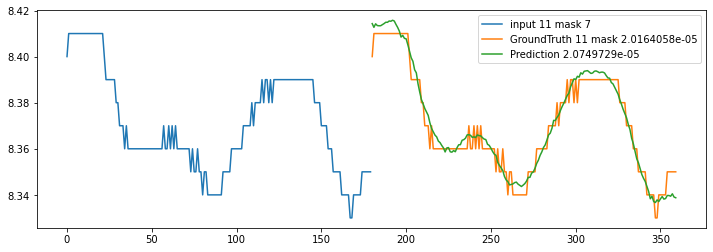

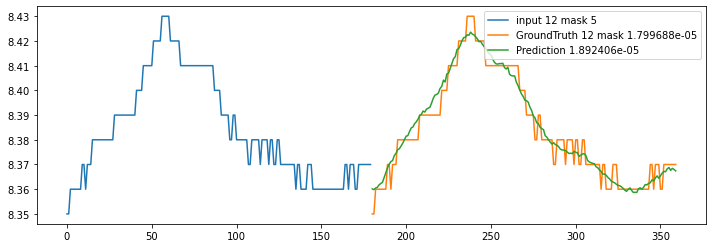

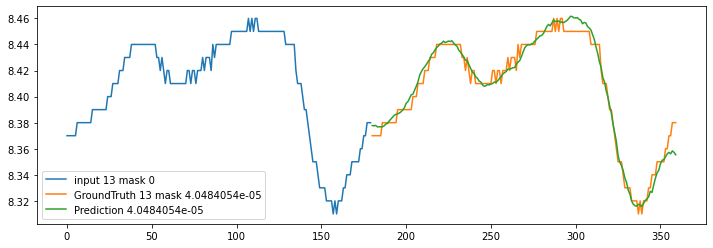

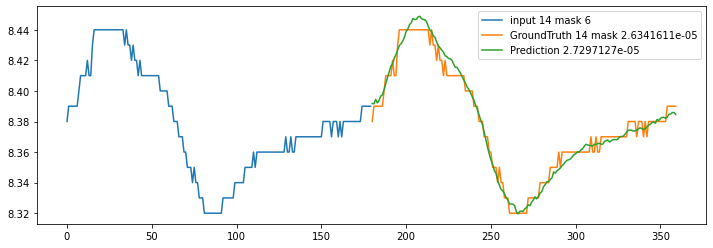

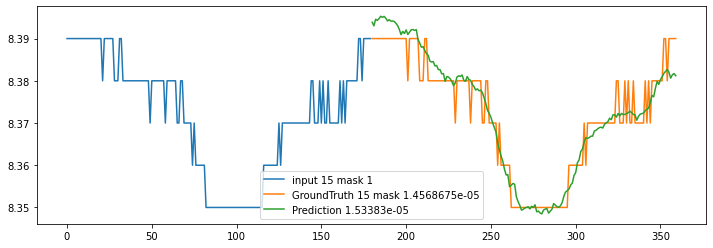

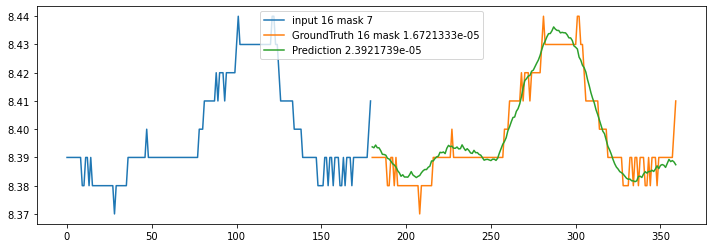

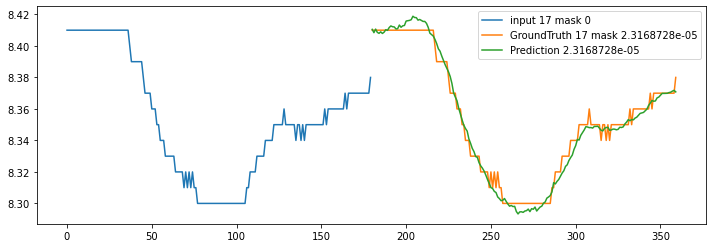

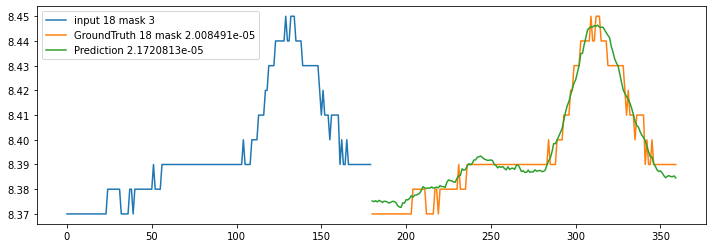

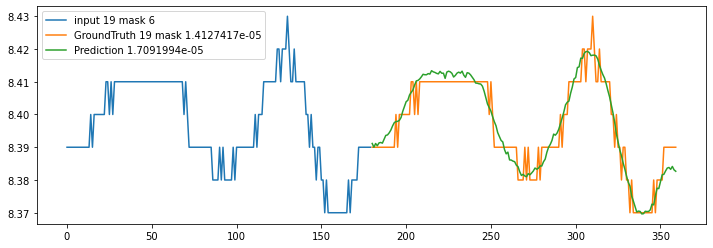

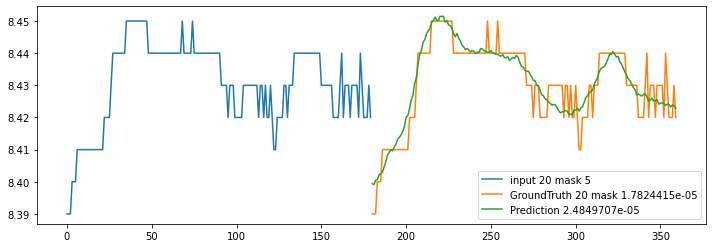

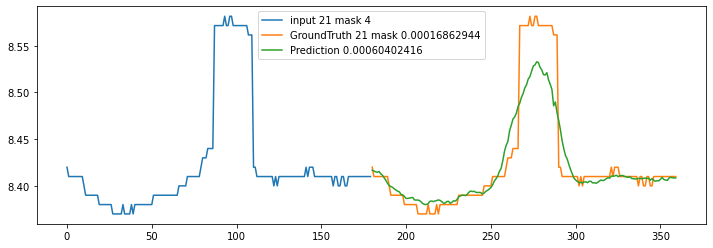

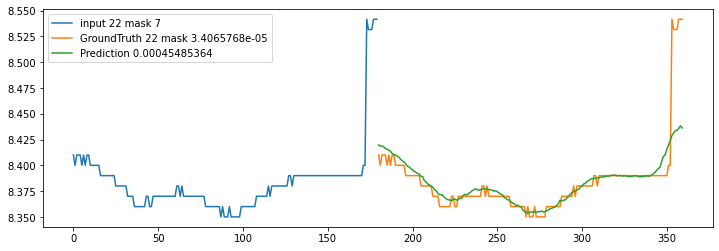

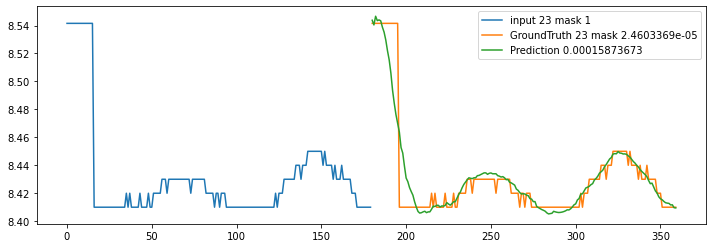

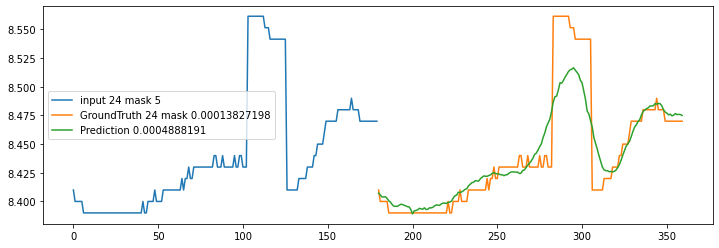

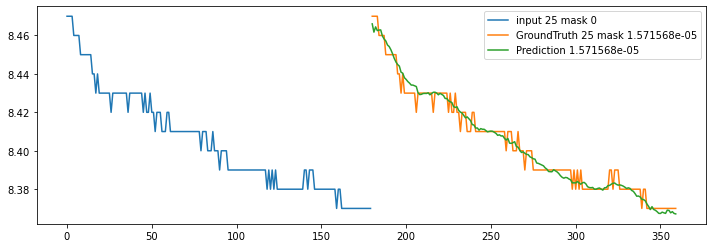

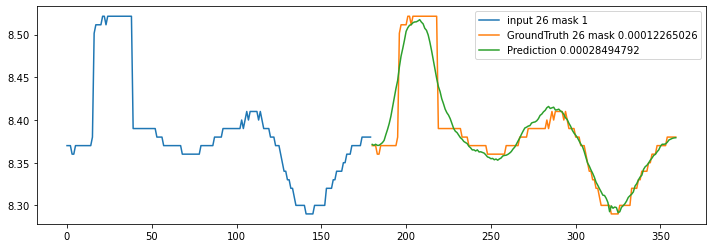

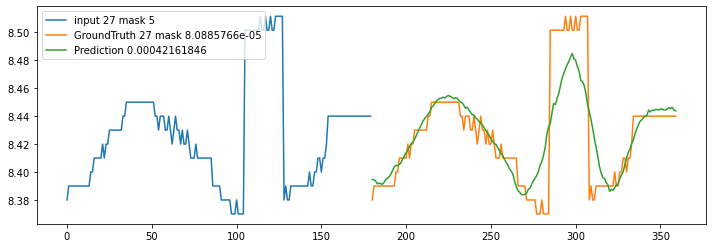

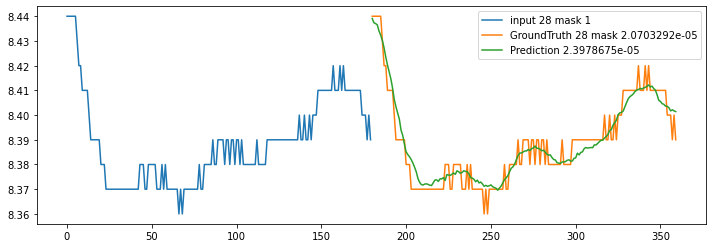

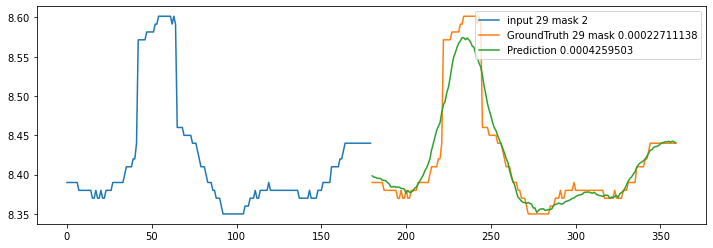

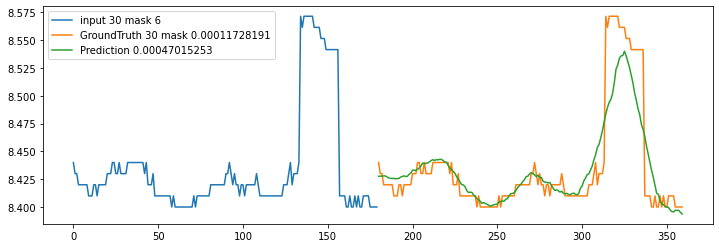

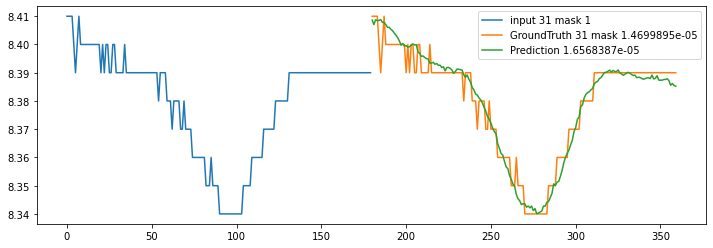

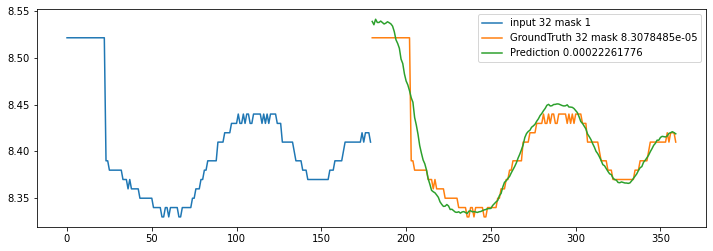

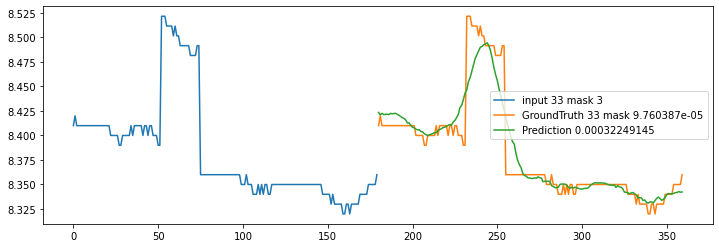

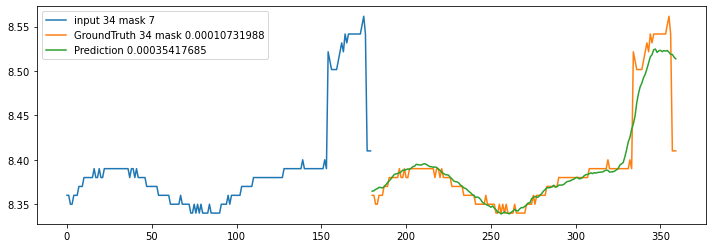

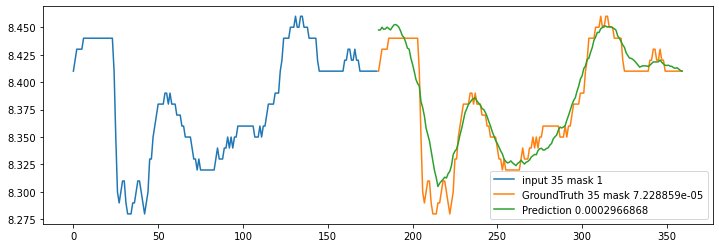

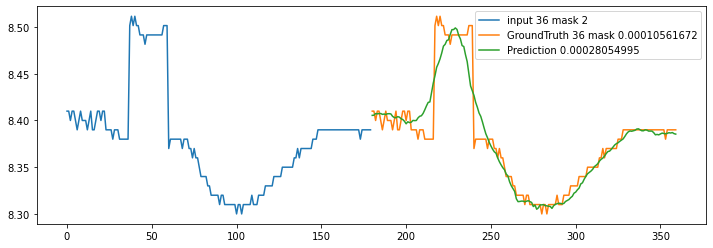

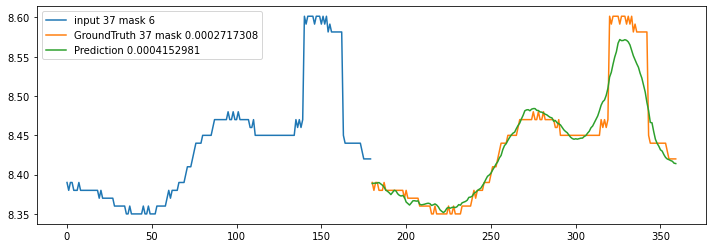

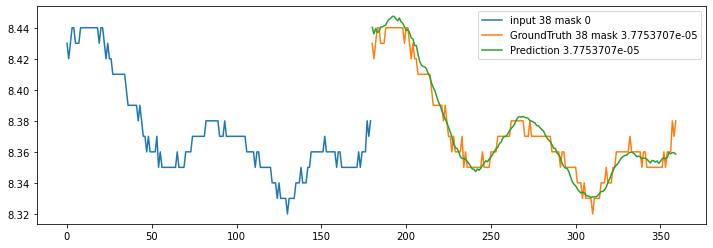

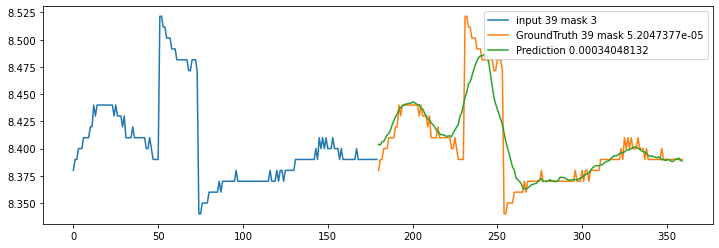

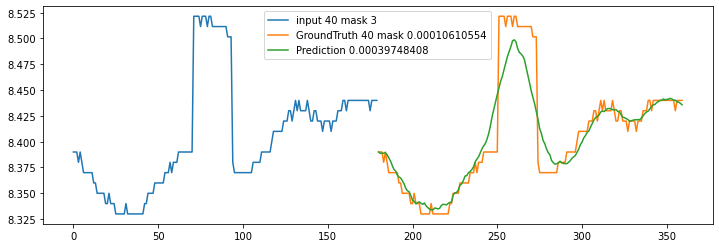

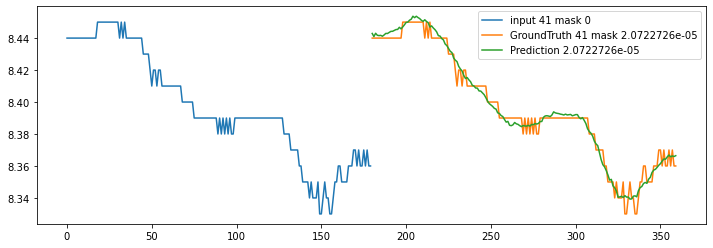

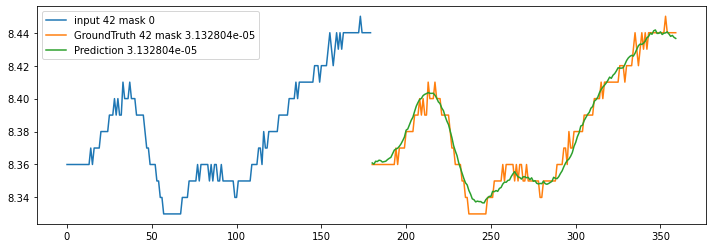

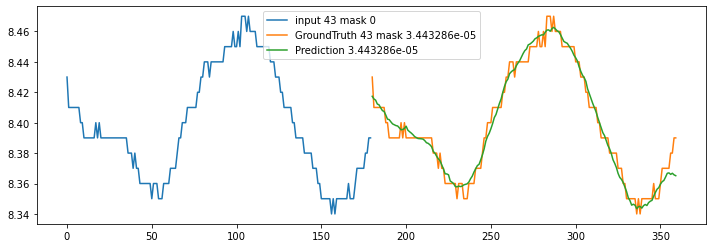

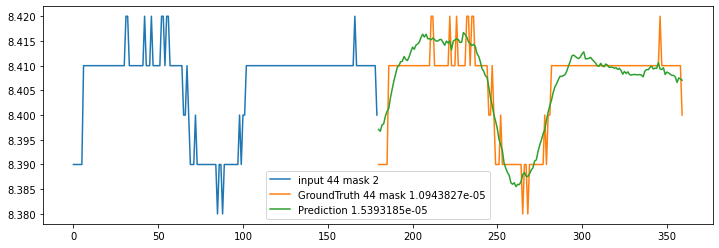

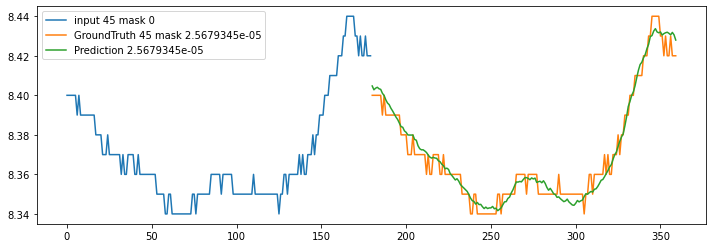

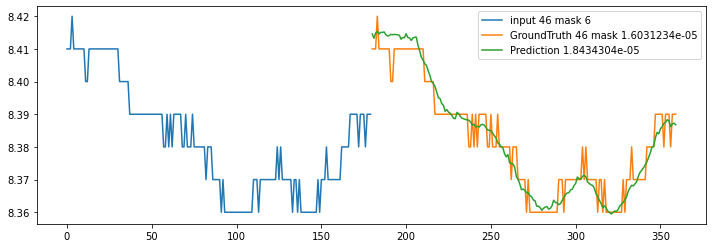

In [48]:
plt.rcParams['figure.figsize'] = (12,4)
x = np.arange(inputs.shape[1]+preds.shape[1])
a = inputs.shape[1]

for c in range(new_pred.shape[0]):
    plt.figure()
    plt.plot(x[:a],inputs[c*8],label='input '+str(c)+" mask "+str(argmin[c]))
    plt.plot(x[a:],trues[c*8,:,0], label='GroundTruth '+str(c)+" mask "+str(mean_squared_error(preds[c*8+argmin[c],:,0],inputs[c*8+argmin[c],:,0])))
    plt.plot(x[a:],preds[c*8,:,0], label='Prediction '+str(mean_squared_error(preds[c*8,:,0],inputs[c*8,:,0])))
    plt.legend()

8
(47, 8, 180)
(47, 8)
[5 0 3 1 1 0 6 0 4 5 1 7 5 0 6 1 7 0 3 6 5 4 7 1 5 0 1 5 1 2 6 1 1 3 7 1 2
 6 0 3 3 0 0 0 2 0 6]
(27, 180) (27, 180)
mse :  0.0020571814


In [50]:
data_mask_test = []
index = range(0,N_input-25,25)
for j in range(new_pred.shape[0]):
    mask = np.zeros(N_input)
    k = argmin[j]-1
    if k>=0:
        mask[index[k]:index[k]+50]=1
    data_mask_test.append(mask)
    # set_trace()
print(np.array(data_mask_test).shape)
# print(data_mask_test)


(47, 180)


In [54]:
DATA_DIRS = '/mnt/cat/data/sandy/Forecasting/'
np.save(DATA_DIRS+"data/water_quality/gecco_test_mask.npy",np.array(data_mask_test).reshape(-1,))

In [ ]:
for i,x in enumerate(np.array(data_mask_test)):
    plt.plot(x*1000)
    plt.plot(trues[i*14])
    plt.show()

In [29]:
import pandas as pd 
import os
plt.rcParams['figure.figsize']=(20,5)
DATA_DIRS = '/mnt/cat/data/sandy/Forecasting/'
df_inject   = pd.read_csv(
    os.path.join(DATA_DIRS, 'data', 'electricity_load_forecasting_panama', '2_percent_electricity.csv')
)
# df_mask   = pd.read_csv(
#     os.path.join('.', 'data', 'masked.csv')
# )


# test_data = np.load(os.path.join(DATA_DIRS,"Outliers","Outlier","test_data.npy"))
# test_l = len(test_data)

data_inj = df_inject[['nat_demand']].to_numpy()
data_mask = df_inject[['label']].to_numpy()

# data_inj = data
#n = data.shape[1]
n = (1903 + 1) * 24 # Select first n=1904*24 entries because of non-stationarity in the data after first n values
data_inj = data_inj[:, :n]
data_mask = data_mask[:, :n]
N_output = 336
units = n//N_output
dev_len = int(0.2*units) * N_output
test_len = int(0.2*units) * N_output
train_len = n - dev_len - test_len

In [30]:
dd = np.array([i[0] for i in true])
dd.shape

(27, 336)

AttributeError: 'list' object has no attribute 'reshape'

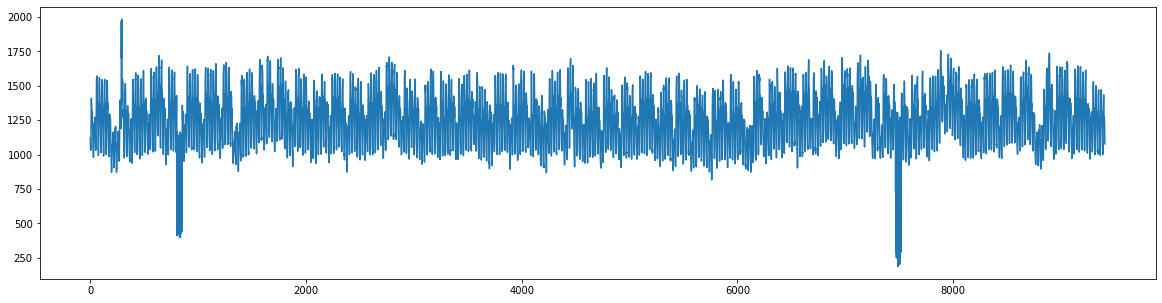

In [32]:
plt.plot(data_inj[train_len+dev_len-N_output:])
plt.plot(np.array(data_mask_test).reshape(-1,))
plt.show()

In [6]:
preds = np.expand_dims(new_pred,-1)
trues = np.expand_dims(new_true,-1)
inputs = new_true

In [ ]:
plt.rcParams['figure.figsize'] = (12,4)
for i in range(54):
    plt.figure()
    c =i 
    x = np.arange(336)
    a = 168
    plt.plot(x[:a],inputs[c],label='input '+str(c))
    plt.plot(x[a:],trues[c,:,0], label='GroundTruth '+str(c))
    #for i in range(1):

    plt.plot(x[a:],preds[c,:,0], label='Prediction '+str(mean_squared_error(trues[c,:,0],preds[c,:,0])))
    
    plt.legend()
    # fig = plt.figure()
    # plt.savefig("images/trans-mse_test_"+str(i)+".png")
    
    # plt.show()